In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import sys
import dlib
import numpy

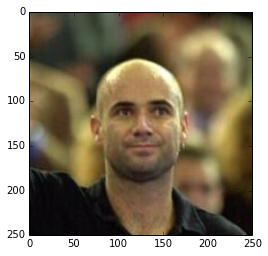

In [2]:
facePath = "Andre_Agassi_0010.jpg"
profilePath = "Andre_Agassi_0007.jpg"
fullImg = cv2.cvtColor(cv2.imread(facePath), cv2.COLOR_BGR2RGB)
profileFullImg = cv2.cvtColor(cv2.imread(profilePath), cv2.COLOR_BGR2RGB)
plt.imshow(fullImg)

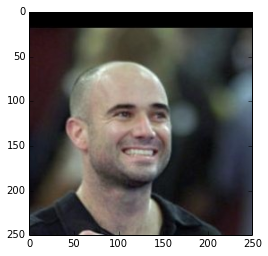

In [3]:
plt.imshow(profileFullImg)

In [4]:
detector = dlib.get_frontal_face_detector()
profileDetector = dlib.get_frontal_face_detector()
dets = detector(fullImg, 1)
profileDets = profileDetector(profileFullImg, 1)
print "face number is {0} & {1}".format(len(dets), len(profileDets))
detect = dets[0]
print "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, detect.left(), detect.top(), detect.right(), detect.bottom())
profileDetect = profileDets[0]
print "& Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, profileDetect.left(), profileDetect.top(),
                                                                     profileDetect.right(), profileDetect.bottom())

face number is 1 & 1
Detection 0: Left: 75 Top: 85 Right: 164 Bottom: 175
& Detection 0: Left: 66 Top: 78 Right: 173 Bottom: 186


In [5]:
shapePredict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

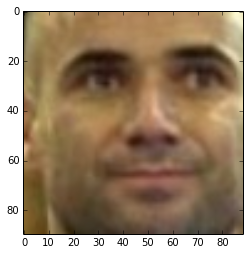

In [6]:
faceImg = fullImg[detect.top():detect.bottom(),detect.left():detect.right(),:]
plt.imshow(faceImg)

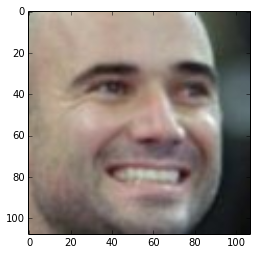

In [7]:
profileImg = profileFullImg[profileDetect.top():profileDetect.bottom(),profileDetect.left():profileDetect.right(),:]
plt.imshow(profileImg)

In [8]:
shape = shapePredict(fullImg, detect)
print "Total parts of {}.".format(shape.num_parts)
profileShape = shapePredict(profileFullImg, profileDetect)
print "&Total parts of {}.".format(shape.num_parts)

Total parts of 68.
&Total parts of 68.


In [9]:
xMin = len(fullImg[0])
xMax = 0
yMin = len(fullImg)
yMax = 0
for i in range(shape.num_parts):
    if (shape.part(i).x < xMin):
        xMin = shape.part(i).x
    if (shape.part(i).x > xMax):
        xMax = shape.part(i).x
    if (shape.part(i).y < yMin):
        yMin = shape.part(i).y
    if (shape.part(i).y > yMax):
        yMax = shape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(xMin, xMax, yMin, yMax)

x min is 79, x max is 169, y min is 99, y max is 181


In [10]:
pxMin = len(profileFullImg[0])
pxMax = 0
pyMin = len(profileFullImg)
pyMax = 0
for i in range(profileShape.num_parts):
    if (profileShape.part(i).x < pxMin):
        pxMin = profileShape.part(i).x
    if (profileShape.part(i).x > pxMax):
        pxMax = profileShape.part(i).x
    if (profileShape.part(i).y < pyMin):
        pyMin = profileShape.part(i).y
    if (profileShape.part(i).y > pyMax):
        pyMax = profileShape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(pxMin, pxMax, pyMin, pyMax)

x min is 61, x max is 159, y min is 102, y max is 191


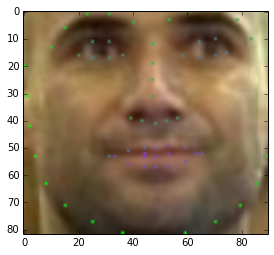

In [11]:
newImage = fullImg
for i in range(len(fullImg)):
    for j in range(len(fullImg[0])):
        found = False
        for k in range(shape.num_parts):
            if (shape.part(k).x == j and shape.part(k).y == i):
                newImage[i][j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newImage[yMin:yMax,xMin:xMax,:])

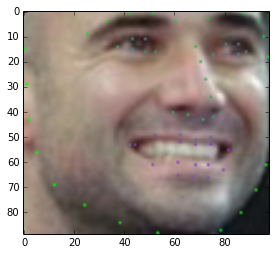

In [67]:
newProfileImage = profileFullImg
for i in range(len(profileFullImg)):
    for j in range(len(profileFullImg[0])):
        found = False
        for k in range(profileShape.num_parts):
            if (profileShape.part(k).x == j and profileShape.part(k).y == i):
                newProfileImage[i][j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newProfileImage[pyMin:pyMax,pxMin:pxMax,:])

In [62]:
import MovingLSQ as MLSQ
controlSrcPts = numpy.zeros((shape.num_parts,2))
controlDstPts = numpy.zeros((profileShape.num_parts,2))

if shape.num_parts != profileShape.num_parts:
    print "nmber not equal!"
for i in range(shape.num_parts):
    if (shape.part(i).x < 0):
        print i + "th part x < 0"
    if (shape.part(i).y < 0):
        print i + "th part y < 0"
    controlSrcPts[i] = [shape.part(i).x, shape.part(i).y]
for i in range(profileShape.num_parts):
    if (profileShape.part(i).x < 0):
        print i + "th part x < 0"
    if (profileShape.part(i).y < 0):
        print i + "th part y < 0"
    controlDstPts[i] = [profileShape.part(i).x, profileShape.part(i).y]

In [63]:
solver = MLSQ.MovingLSQ(controlSrcPts, controlDstPts)
imgIdx = numpy.zeros((len(newProfileImage)*len(newProfileImage[0]),2))

for i in range(len(newProfileImage)):
    for j in range(len(newProfileImage[0])):
        imgIdx[i*len(newProfileImage[0]) + j] = [i, j]
imgMls = solver.Run_Rigid(imgIdx)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.4500e+25                                    1.43e+02    
       1             29         6.4500e+25      0.00e+00       0.00e+00       1.43e+02    
`xtol` termination condition is satisfied.
Function evaluations 29, initial cost 6.4500e+25, final cost 6.4500e+25, first-order optimality 1.43e+02.


In [64]:
mlsMargin = [0, 0, len(newProfileImage[0]), len(newProfileImage)]
for i in range(len(imgMls)):
    if (imgMls[i][0] < mlsMargin[0]):
        mlsMargin[0] = imgMls[i][0]
    if (imgMls[i][1] < mlsMargin[1]):
        mlsMargin[1] = imgMls[i][1]
    if (imgMls[i][0] > mlsMargin[2]):
        mlsMargin[2] = imgMls[i][0]
    if (imgMls[i][1] > mlsMargin[3]):
        mlsMargin[3] = imgMls[i][1]
mlsMargin[2] -= len(newProfileImage[0])
mlsMargin[3] -= len(newProfileImage)
print mlsMargin

[-3.25595981930293, 0, 0, 4.5748703616057185]


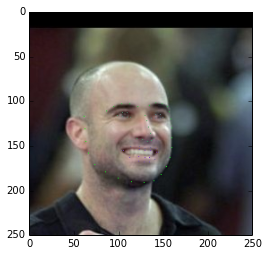

In [66]:
import math
imgMlsMap = imgMls.reshape((len(newProfileImage), len(newProfileImage[0]), 2))
leftMargin = math.ceil(mlsMargin[0])
topMargin = math.ceil(mlsMargin[1])
rightMargin = math.ceil(mlsMargin[2])
bottomMargin = math.ceil(mlsMargin[3])
deformedImage = numpy.zeros((len(newProfileImage) + int(topMargin) + int(bottomMargin), 
                             len(newProfileImage[0]) + int(leftMargin) + int(rightMargin), 3))
for i in range(len(newProfileImage)):
    for j in range(len(newProfileImage[0])):
        x = int(math.floor(imgMlsMap[i, j][0]) + xMargin)
        y = int(math.floor(imgMlsMap[i, j][1]) + yMargin)
        deformedImage[y, x] = newProfileImage[i, j]
plt.imshow(newProfileImage)